## **Remote work affect on mental health analysis**

Hello!  
  
In this notebook I will analyze a survey of employees about the effect of remote work on their mental  health.   
I will start by analyzing the dataset in an exploratory manner, and after that I will analyze the remote work affects.

In [45]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and cleaning the data

In [30]:
df = pd.read_csv('/content/Impact_of_Remote_Work_on_Mental_Health.csv')

In [31]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [56]:
df.dtypes

,0
Employee_ID,category
Age,int64
Gender,category
Job_Role,category
Industry,category
Years_of_Experience,int64
Work_Location,category
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [33]:
df.isna().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


We can see that there are many Na values in the "Mental_Health_Condition" and the "Physical_Activity" Columns.  
However, after taking another look at the values in these columns, it looks like the option of "None" for these values (Means no mental health conditions or no physical activity) interpreted as a missing value here.  
I will fix it by changing the type of the None values to "No".

In [34]:
df.fillna("No", inplace=True)
df.isna().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [40]:
df.duplicated().sum()

0

Change all the "Object" type columns to category type

In [41]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

In [55]:
df.dtypes

,0
Employee_ID,category
Age,int64
Gender,category
Job_Role,category
Industry,category
Years_of_Experience,int64
Work_Location,category
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [44]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


## **General info and statistics about the data and its variables**

In [62]:
Numeric_df = df.select_dtypes(include = ['int64'])
Categorical_df = df.select_dtypes(include = ['category'])

### Numeric variables correlation

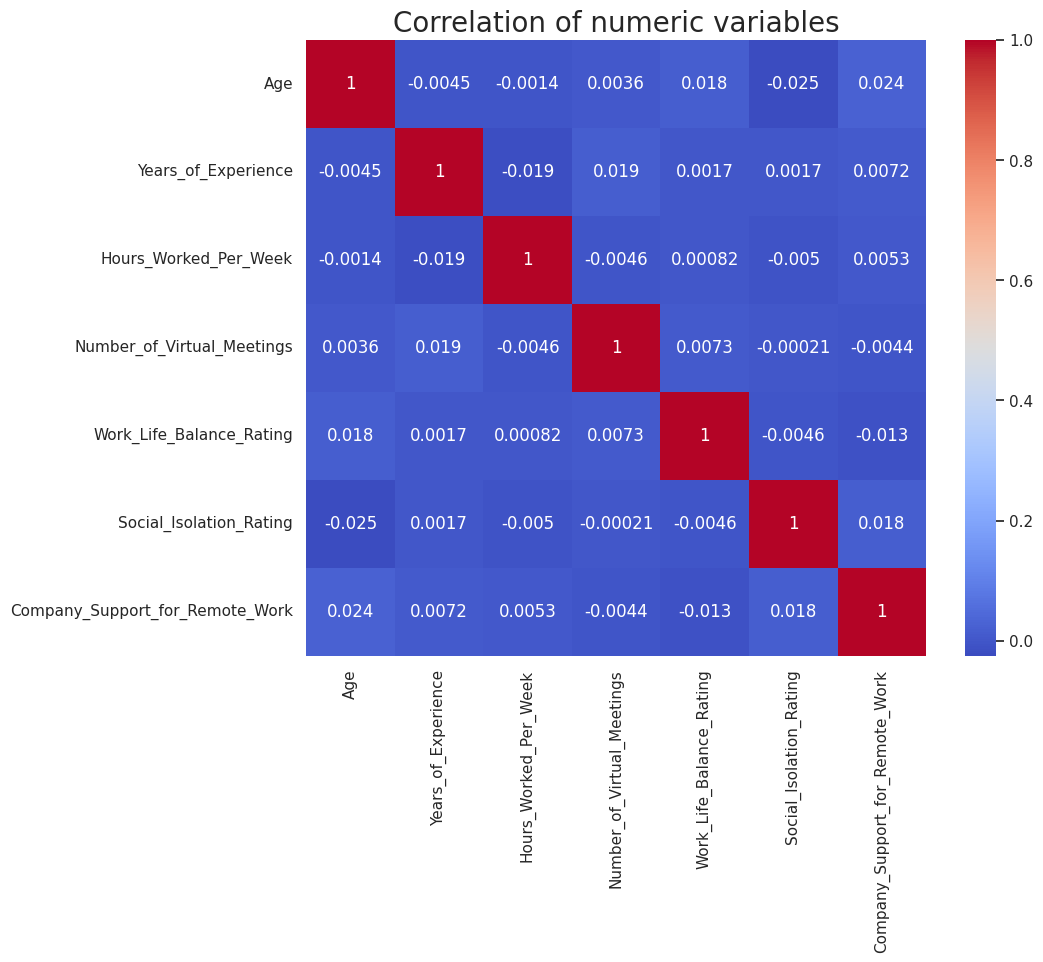

In [131]:
## Correlation of numeric variables:
fig = plt.figure(figsize = (10,8))
sns.heatmap(Numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of numeric variables', size = 20)
plt.show()

### Categorical variables Cramer's V

In [77]:
# Create the function to calculate Cramér's V result

from scipy.stats import chi2_contingency

# Take only the categorical data from the data set
df_categorical = df.select_dtypes(include=['category']).copy()
df_categorical = df_categorical[df_categorical.columns[1:]] # Exclude the EmpId which is also a category

# Function to calculate Cramér's V between two categorical columns
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(r-1, k-1))

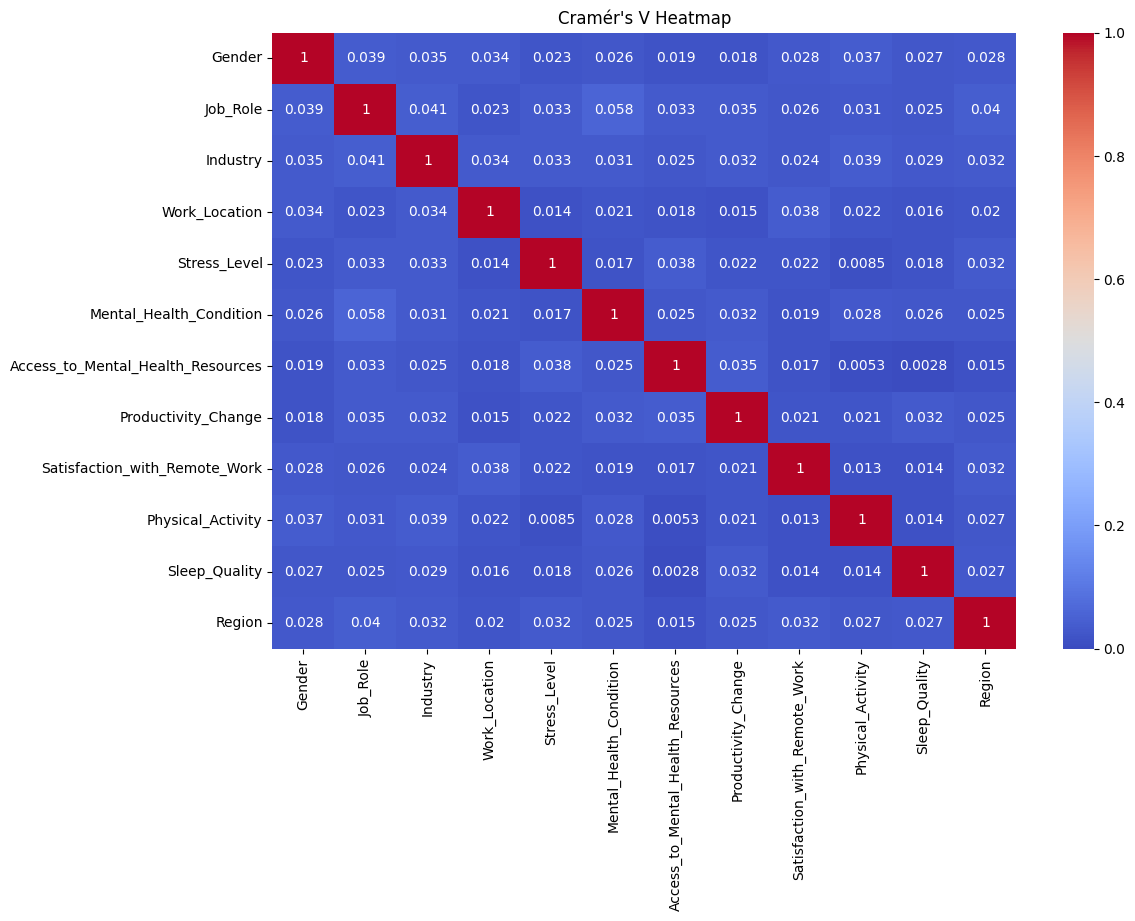

In [80]:
# Create an empty DataFrame to store Cramér's V values
columns = df_categorical.columns
cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)

# Calculate Cramér's V for each pair of columns
for col1 in columns:
    for col2 in columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

# Convert to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap")
plt.show()


Looks like there are no correlations at all acroos the categorical and the numeric variables.  
It looks non real.

### Demographic

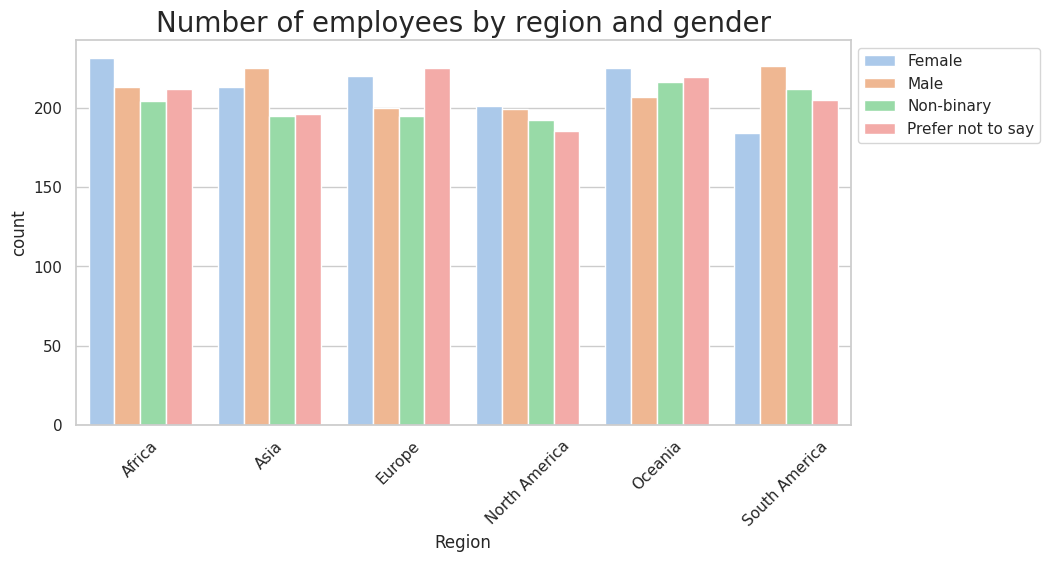

In [134]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Count number of employees by regions
sns.set_style("whitegrid")
sns.set_palette('pastel')
fig = plt.figure(figsize = (10,5))

sns.countplot(x='Region', hue = 'Gender', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Number of employees by region and gender', size = 20)
plt.xticks(rotation=45)
plt.show()

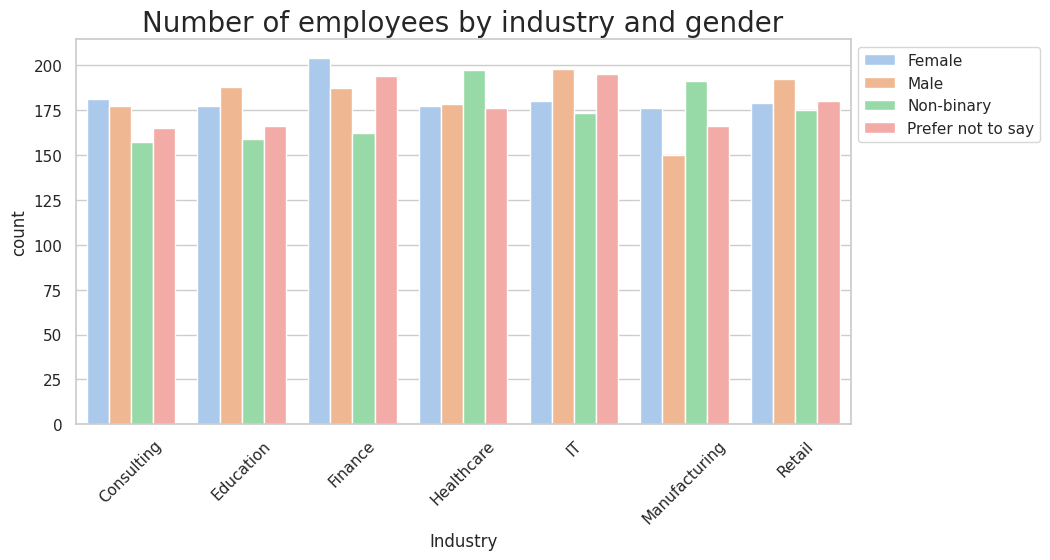

In [136]:
## Count number of employees by Industry
sns.set_style("whitegrid")
sns.set_palette('pastel')
fig = plt.figure(figsize = (10,5))

sns.countplot(x='Industry', hue = 'Gender', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Number of employees by industry and gender', size = 20)
plt.xticks(rotation=45)
plt.show()

So far it looks like a generated data which is not real because the distribution of Genders looks non real. This is in addition to the non-correlated data.  
quarter of employees in Africa are non-binary?  
All the regions have similar number of employees? Most of the time it is not the case.  
All the departments have similar number of employees etc.


### Checking data reliability

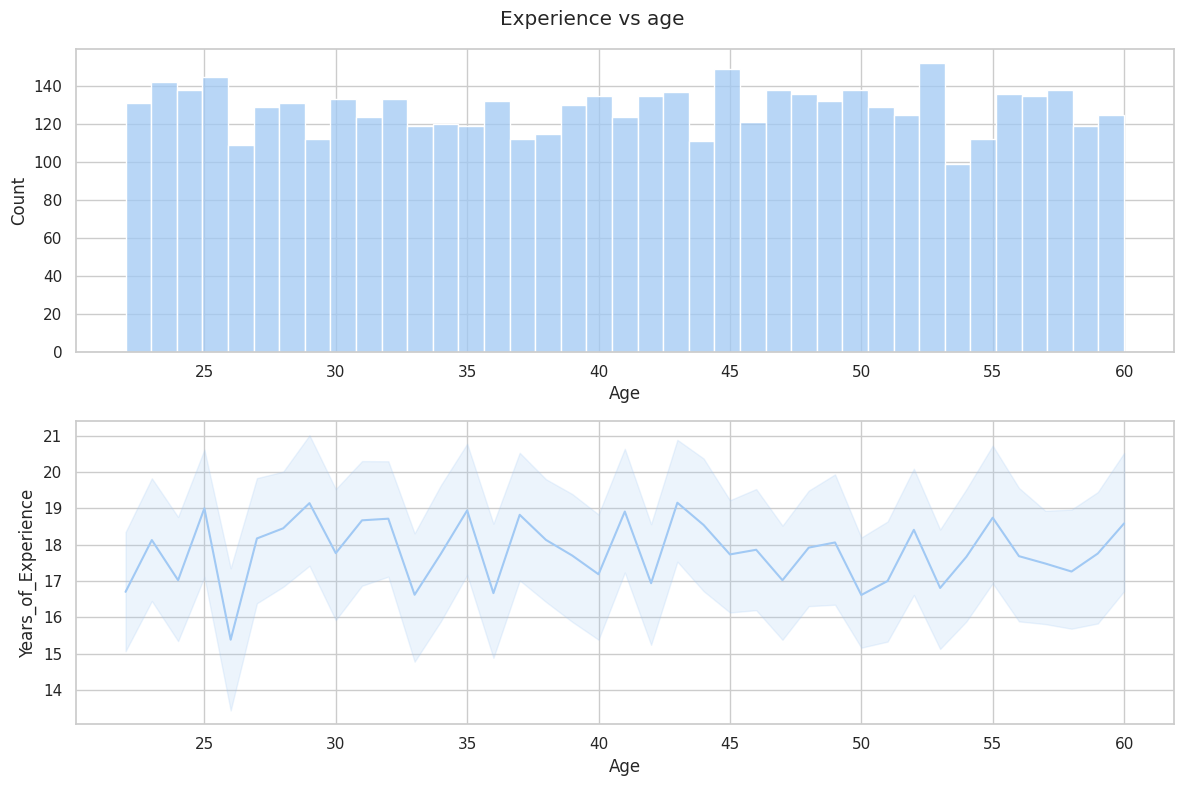

In [141]:
## I will check if the data is real by checking age vs years of experience

fig, axes = plt.subplots(2, 1, figsize = (12,8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale= 1 , rc={"lines.linewidth": 2.5})
sns.set_theme(style="whitegrid", palette="pastel")
plt.suptitle('Experience vs age')

# Check the distribution of age
sns.histplot(df['Age'], bins = 39, ax = axes[0])

#Check the correlation between age and years of experience.
sns.lineplot(x='Age', y='Years_of_Experience', data = df, ax = axes[1])

plt.tight_layout()
plt.show()

# The data is not a real world data!  

The plot of Years of experience vs. age shows it very clearly, It is not possible.
the data is artificial and generated with values taken randomly from a uniform distribution.


I will stop Analyzing here because it is less interesting to analyze artificially generated data, which propbably doesn't represent the real world.